In [1]:
from models import BiLSTM, BiRNN
import modal
import torch 
import lab
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import scipy
import pydvma as dvma

In [3]:
class BiLSTM2(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        # calls parent class constructor
        super(BiLSTM2, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True, dropout=0.0)
        # hidden_size * 2 because we are using a bidirectional RNN (double the length of the hidden state)
        self.fc = nn.Linear(hidden_size*2, num_classes)
        self.droput = nn.Dropout(0.3)
        # self.bn = nn.BatchNorm1d(hidden_size*2)
        
    def forward(self, x):
        out, _ = self.lstm(x)
        # out = out.permute(0, 2, 1)
        # out = self.bn(out)
        # sequence-to-sequence classification problem where you want to classify each time step in the sequence independently.
        # Pass each time step's output through a fully connected layer
        out = self.fc(out)
        out = self.droput(out)
        return out

In [4]:
multiclass = torch.load('extended_model_multiclass(17.01)_150epochs.pth')
singeclass = torch.load('extended_model(15.01)_50epochs.pth')
singeclass_norm = torch.load('extended_model_norm(15.01)_50epochs.pth')
max_norm_multiclass = torch.load('norm_95_max(07.02).pth')
max_norm_multiclass_2 = torch.load('norm_95_max(08.02).pth')
max_norm_multiclass_3 = torch.load('norm_95_max(09.02).pth')
max_norm_multiclass_4 = torch.load('norm_95_max(10.02).pth')
max_norm_multiclass_5 = torch.load('norm_95_max(10.02)_50epochs.pth')
max_norm_multiclass_6 = torch.load('norm_95_max(11.02).pth')
max_norm_multiclass_7 = torch.load('norm_95_max(15.02).pth')
max_norm_multiclass_7_2 = torch.load('norm_95_max(15.02)_50epochs.pth')
max_norm_multiclass_8 = torch.load('norm_95_max(16.02).pth')
max_norm_multiclass_9 = torch.load('norm_95_max(16.02)_2.pth')
max_norm_multiclass_10 = torch.load('norm_95_max(21.02).pth')

FileNotFoundError: [Errno 2] No such file or directory: 'extended_model_multiclass(17.01)_150epochs.pth'

In [4]:
max_norm_multiclass_11 = torch.load('norm_95_max(22.02).pth')
max_norm_multiclass_11_2 = torch.load('norm_95_max(22.02)_50epochs.pth')
max_norm_multiclass_12 = torch.load('norm_95_max(27.02).pth')
max_norm_multiclass_13 = torch.load('norm_95_max(28.02).pth')
max_norm_multiclass_14 = torch.load('norm_95_max(07.03).pth')

In [3]:
class BiLSTM_larger(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        # calls parent class constructor
        super(BiLSTM_larger, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True, dropout=0.3)
        # hidden_size * 2 because we are using a bidirectional RNN (double the length of the hidden state)
        self.fc = nn.Linear(hidden_size*2, hidden_size*2)
        self.fc2 = nn.Linear(hidden_size*2, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(0.3)
        # self.bn = nn.BatchNorm1d(hidden_size*2)
        
    def forward(self, x):
        out, _ = self.lstm(x)
        # out = out.permute(0, 2, 1)
        # out = self.bn(out)
        # sequence-to-sequence classification problem where you want to classify each time step in the sequence independently.
        # Pass each time step's output through a fully connected layer
        out = self.fc(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.dropout(out)
        out = self.fc3(out)
        out = self.dropout(out)
        return out

In [4]:
max_norm_multiclass_15 = torch.load('norm_95_max(15.05).pth')
max_norm_multiclass_16 = torch.load('norm_95_max(16.05).pth')

In [54]:
class PositionalEncoding(nn.Module):
    """Implement the positional encoding function.

    Code used from PyTorch documentation:
    https://pytorch.org/tutorials/beginner/transformer_tutorial.html
    """

    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer("pe", pe)

    def forward(self, x):
        """
        Args:
            x: embeddings (batch_size, seq_len, d_model)

        Returns:
            x: embeddings + positional encodings (batch_size, seq_len, d_model)
        """
        x = x + self.pe[:, : x.size(1)].requires_grad_(False)
        x = self.dropout(x)
        return x

class TransformerModel(nn.Module):
    def __init__(
        self, d_model=256, n_head=8, n_layers=6, dropout=0.1, dim_feedforward=512, num_classes=3
    ):
        super(TransformerModel, self).__init__()
        assert d_model % n_head == 0, "d_model must be divisible by n_head"

        self.relu = nn.ReLU()

        self.embedding1 = nn.Linear(4, int(d_model / 2))
        self.embedding2 = nn.Linear(int(d_model / 2), int(d_model / 2))
        self.embedding3 = nn.Linear(int(d_model / 2), d_model)

        self.pos_encoder = PositionalEncoding(d_model, dropout=dropout)
        self.encoder_layer = nn.TransformerEncoderLayer(
            d_model,
            nhead=n_head,
            batch_first=True,
            dropout=dropout,
            dim_feedforward=dim_feedforward,
        )
        self.encoder = nn.TransformerEncoder(
            self.encoder_layer, num_layers=n_layers
        )  # Multi-layer transformer encoder

        self.decoder1 = nn.Linear(d_model, int(d_model / 2))
        self.decoder2 = nn.Linear(int(d_model / 2), int(d_model / 2))
        self.decoder3 = nn.Linear(int(d_model / 2), num_classes)

    def forward(self, x):
        """
        Args:
            x: input data (batch_size, seq_len, 1)
        """
        x = self.embedding1(x)
        x = self.relu(x)
        x = self.embedding2(x)
        x = self.relu(x)
        x = self.embedding3(x)

        src = self.pos_encoder(x)  # (batch_size, seq_len, d_model)
        output = self.encoder(src)  # (batch_size, seq_len, d_model)

        output = self.decoder1(output)  # (batch_size, seq_len, d_model/2)
        output = self.relu(output)
        output = self.decoder2(output)  # (batch_size, seq_len, d_model/2)
        output = self.relu(output)
        output = self.decoder3(output)  # (batch_size, seq_len, 1)
        return output

In [52]:
transformer1 = torch.load('transformer1(16.05).pth')

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [6]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

In [7]:
def lab_predictions(model, tf_arr, multiclass=False, normalise = None, extended=False, w = None, max_norm=False, phase=False, logmag=False, scaled_logmag=False):
    """Predictions from a trained model on a given transfer function."""

    if extended:
        if normalise is not None:
            tf_arr2 = normalise(tf_arr)
            real_imag = modal.split_real_imag(tf_arr2)
            extended_tf = lab.extend_lab_tf(tf_arr)
            extended_tf[:,0] = real_imag[:,0]
            extended_tf[:,1] = real_imag[:,1]
        else:
            if max_norm:
                real_imag = modal.split_real_imag(tf_arr)
                phase = np.arctan(np.imag(tf_arr)/np.real(tf_arr))
                if phase is True:
                    phase = np.mod(phase, 2*np.pi) # phase is between 0 and 2pi
                mag = np.abs(tf_arr)
                max_mag = np.max(mag)
                mag = mag / (0.95 * max_mag)
                real_imag = real_imag / (0.95 * max_mag)
                if logmag is True:
                    logmagnitude = np.log10(mag)
                    if scaled_logmag is True:
                        logmagnitude = (logmagnitude - np.mean(logmagnitude)) / np.std(logmagnitude)
                    extended_tf = np.concatenate((real_imag, phase.reshape(-1,1), mag.reshape(-1,1), logmagnitude.reshape(-1,1)), axis=1)
                else:
                    extended_tf = np.concatenate((real_imag, phase.reshape(-1,1), mag.reshape(-1,1)), axis=1)
                # plt.plot(mag)
                # plt.show()
                # plt.plot(modal.to_db(tf_arr))
                # plt.show()
                # plt.plot(phase)
                # plt.show()
            else:
                extended_tf = lab.extend_lab_tf(tf_arr)
        lab_tf_tensor = torch.from_numpy(extended_tf).to(torch.float32)
    else:
        lab_tf = modal.split_real_imag(tf_arr).reshape(1, -1, 2)
        if normalise is not None:
            lab_tf = normalise(lab_tf)
        lab_tf_tensor = torch.from_numpy(lab_tf).to(torch.float32)

    model.eval()
    with torch.no_grad():
        lab_tf_output = model(lab_tf_tensor)
    
    if multiclass:
        test_op = np.array(lab_tf_output.numpy())
        predictions = np.argmax(test_op, axis=-1).reshape(-1)
    else:
        test_op = lab_tf_output.numpy().reshape(-1)
        predictions = (test_op > 0.0).astype(int)
    
    input_tf = modal.split_real_imag(tf_arr)
    y = predictions

    fig, ax = plt.subplots(figsize=(7,4))
    if w is None:
        w = np.linspace(0, 1, len(y))
    if normalise is not None:
        tf = modal.to_db(normalise(input_tf))
    elif max_norm is True:
        tf = modal.to_db(real_imag)
    else:
        tf = modal.to_db(input_tf)

    ax.plot(w, tf, label = 'Transfer Function', c='blue', alpha=0.7)
    ax.scatter(w[y == 1], tf[y == 1], c='red', marker='o', label=r'Model Predictions (Class 1)')
    if multiclass:
        ax.scatter(w[y == 2], tf[y == 2], c='orange', marker='o', label=r'Model Predictions (Class 2)')
    if w is not None:
        ax.set_xlabel('Frequency')
    else:
        ax.set_xlabel('Normalised Frequency')
    ax.set_ylabel('Magnitude (dB)')
    ax.legend()
    plt.show()

    return test_op

In [8]:
def plot_lab_predictive_probs(pred):
    plt.figure(figsize=(7,4))
    plt.plot(np.linspace(0,1, pred.shape[0]), sigmoid(pred), color='black', linestyle='--', label = r'Raw model predictions $p(y_m=1)$')
    plt.xlabel('Normalised Frequency')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

In [9]:
def plot_lab_predictive_probs_multiclass(pred):
    plt.figure(figsize=(7,4))
    plt.plot(np.linspace(0,1, pred.shape[0]), softmax(pred)[:,0], label='Class 0', color='blue', alpha=0.7)
    plt.plot(np.linspace(0,1, pred.shape[0]), softmax(pred)[:,1], label='Class 1', color='red', linestyle='--')
    plt.plot(np.linspace(0,1, pred.shape[0]), softmax(pred)[:,2], label='Class 2', color='green')
    plt.xlabel('Normalised Frequency')
    plt.ylabel('Probability')
    plt.legend(loc='right')
    plt.show()

### Beam Data

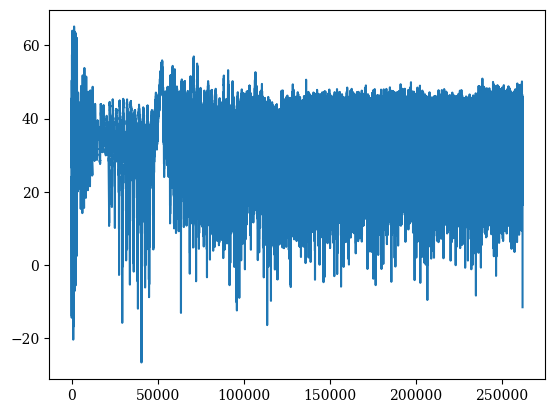

In [35]:
beam_data = scipy.io.loadmat('./Lab Data/Beam/G_set.mat')
beam_tf = beam_data['yspec'][:, -1] # shape = (262145,)
plt.plot(modal.to_db(beam_tf))

[0.00000000e+00 1.90734499e-01 3.81468999e-01 ... 4.99995232e+04
 4.99997139e+04 4.99999046e+04]
(262145,)
(262144,)


/var/folders/mw/j7jd8sy576gdhd74r9ppm1qc0000gn/T/ipykernel_43070/3249439913.py:5: RuntimeWarning: divide by zero encountered in divide
  beam_tf_vel = beam_tf / (1j * faxis)


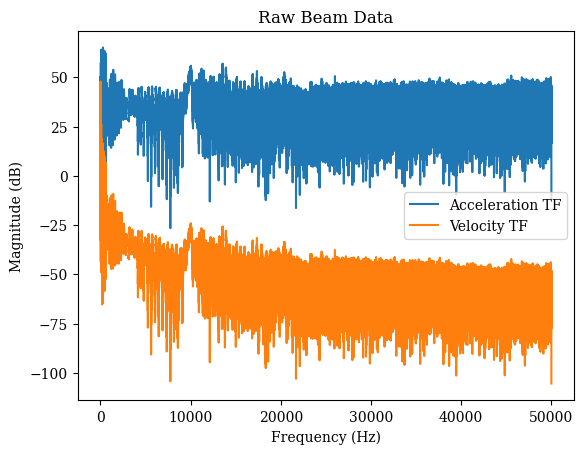

In [36]:
faxis = np.fft.rfftfreq(2 * beam_tf.shape[0] - 1, d=1/100000)
print(faxis)
print(faxis.shape)
# beam_tf_vel = beam_tf / (1j * 2 * np.pi * faxis) # 2pi ??
beam_tf_vel = beam_tf / (1j * faxis)
beam_tf_vel = beam_tf_vel[1:] # remove 0 frequency (division by 0 issues, model doesnt work ?)
faxis = faxis[1:]
print(beam_tf_vel.shape)
plt.figure()
plt.plot(faxis, modal.to_db(beam_tf)[1:], label='Acceleration TF')
plt.plot(faxis, modal.to_db(beam_tf_vel), label='Velocity TF')
# plt.plot(faxis, modal.to_db(modal.normalise_rms(beam_tf_vel)), label='Velocity TF (RMS Normalised)')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Raw Beam Data')
plt.show()
# plt.plot(faxis, modal.to_db(modal.normalise_rms(beam_tf_vel)))

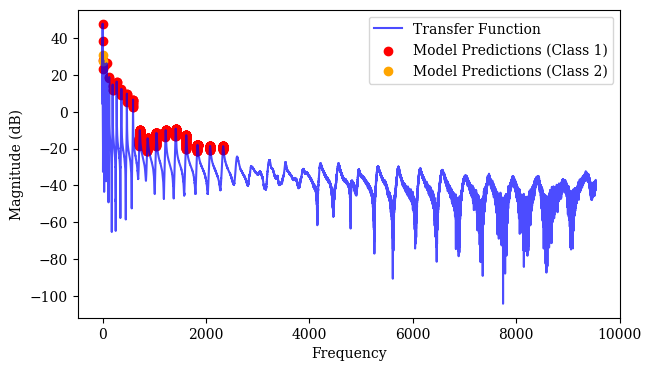

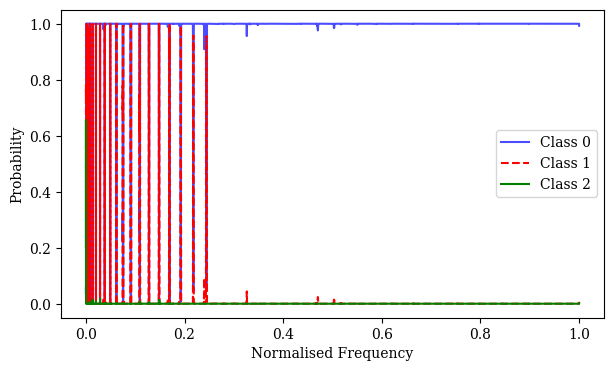

In [224]:
beam_predictions = lab_predictions(multiclass, beam_tf_vel[:50000], normalise=None, multiclass=True, extended=True, w=faxis[:50000])
plot_lab_predictive_probs_multiclass(beam_predictions)


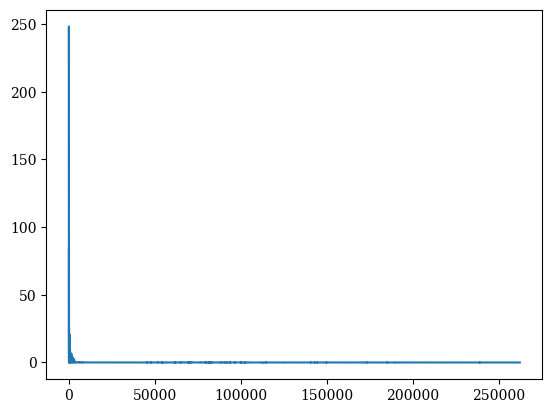

In [257]:
plt.plot(np.abs(beam_tf_vel))

In [417]:
beam_tf_vel2 = beam_tf[1:] / (1j * 2 * np.pi * faxis) # with divide by 2pi this time

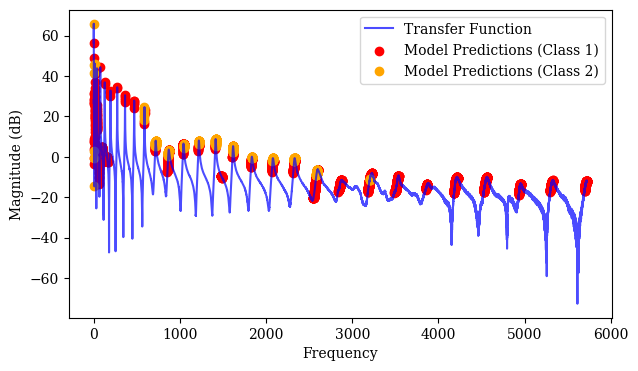

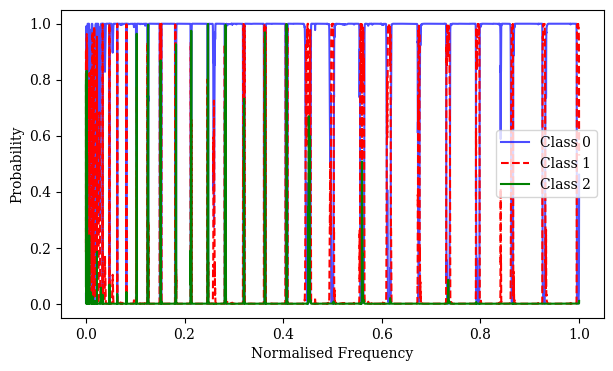

In [238]:
beam_predictions = lab_predictions(multiclass, beam_tf_vel2[:30000]*50, normalise=None, multiclass=True, extended=True, w=faxis[:30000])
plot_lab_predictive_probs_multiclass(beam_predictions)


/Users/vaibhav/Documents/Engineering/Project/src/lab.py:62: RuntimeWarning: divide by zero encountered in divide
  phase = np.arctan(np.imag(lab_tf)/np.real(lab_tf))


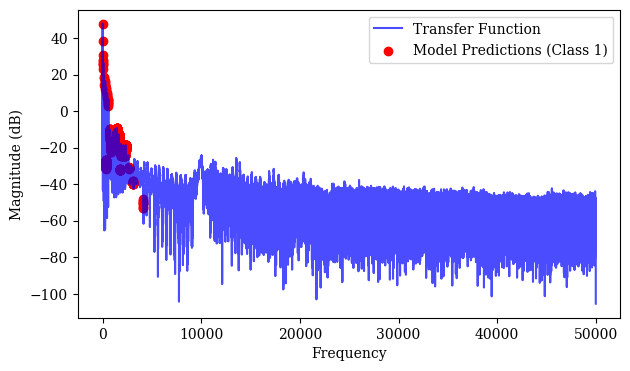

In [65]:
beam_predictions = lab_predictions(singeclass, beam_tf_vel[:], normalise=None, multiclass=False, extended=True, w=faxis[:])


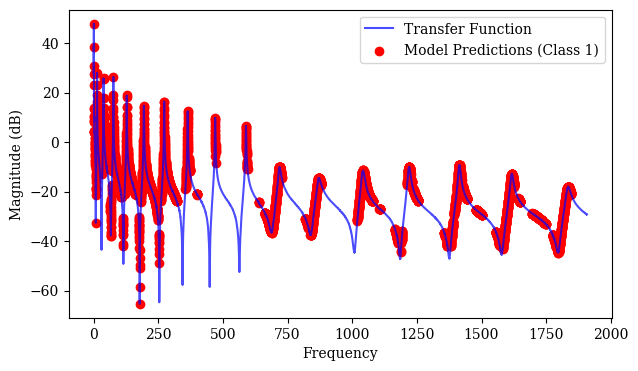

In [67]:
beam_predictions = lab_predictions(singeclass_norm, beam_tf_vel[:10000], normalise=modal.normalise_rms, multiclass=False, extended=True, w=faxis[:10000])


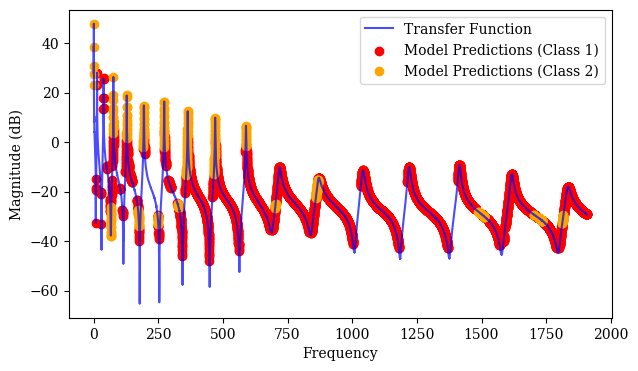

In [303]:
beam_predictions = lab_predictions(max_norm_multiclass, beam_tf_vel[:10000], normalise=None, multiclass=True, extended=True, w=faxis[:10000], max_norm=True, phase=True)

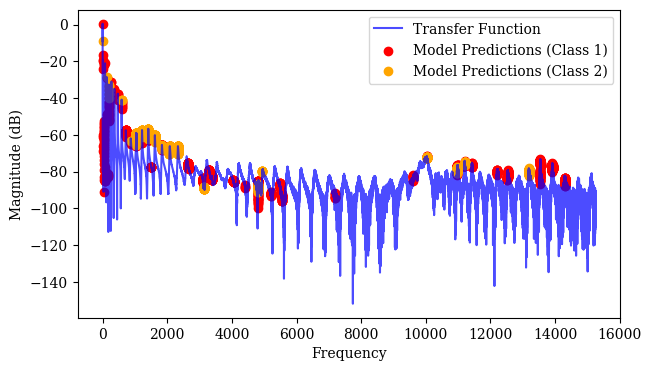

In [366]:
start = 0
end = 80000
beam_predictions = lab_predictions(max_norm_multiclass_2, beam_tf_vel[start:end], normalise=None, multiclass=True, extended=True, w=faxis[start:end], max_norm=True, phase=False)

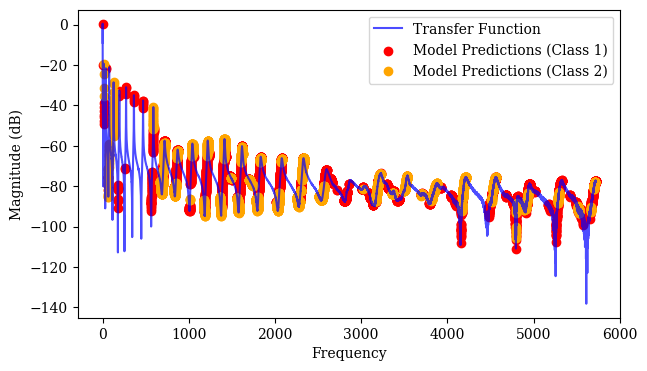

In [384]:
start = 0
end = 30000
beam_predictions = lab_predictions(max_norm_multiclass_3, beam_tf_vel[start:end], normalise=None, multiclass=True, extended=True, w=faxis[start:end], max_norm=True, phase=False)

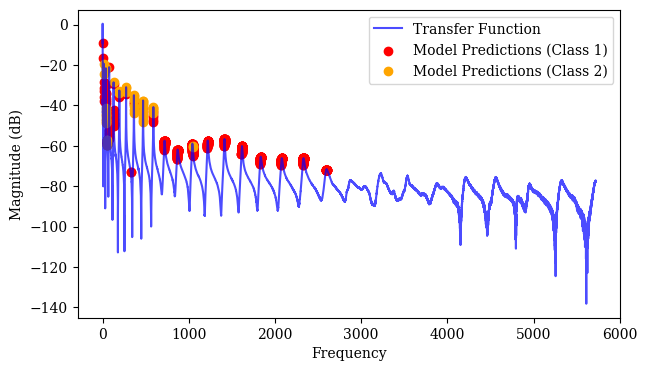

In [407]:
start = 0
end = 30000
beam_predictions = lab_predictions(max_norm_multiclass_5, beam_tf_vel[start:end], normalise=None, multiclass=True, extended=True, w=faxis[start:end], max_norm=True, phase=False, logmag=True)

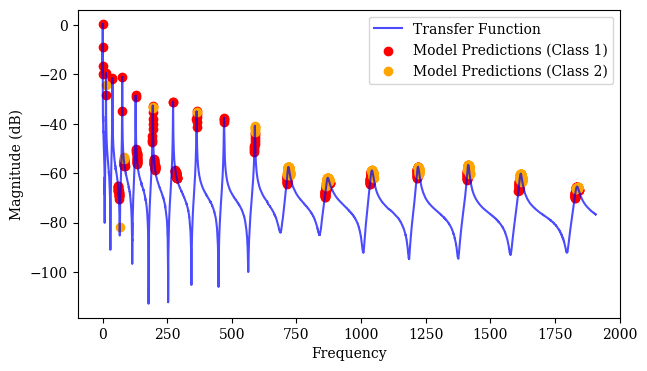

In [411]:
start = 0
end = 10000
beam_predictions = lab_predictions(max_norm_multiclass_6, beam_tf_vel[start:end], normalise=None, multiclass=True, extended=True, w=faxis[start:end], max_norm=True, phase=False, logmag=True)

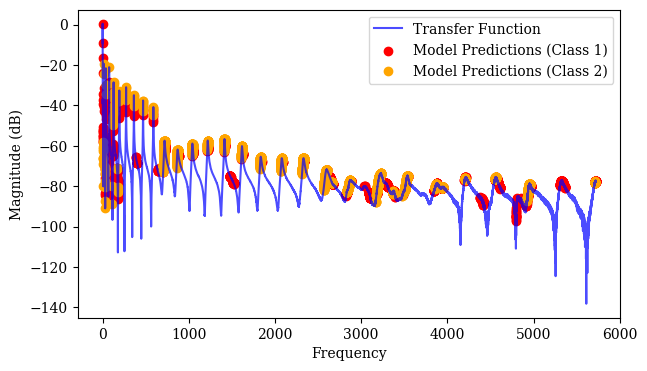

In [420]:
start = 0
end = 30000
beam_predictions = lab_predictions(max_norm_multiclass_7, beam_tf_vel[start:end], normalise=None, multiclass=True, extended=True, w=faxis[start:end], max_norm=True, phase=False, logmag=True, scaled_logmag=True)

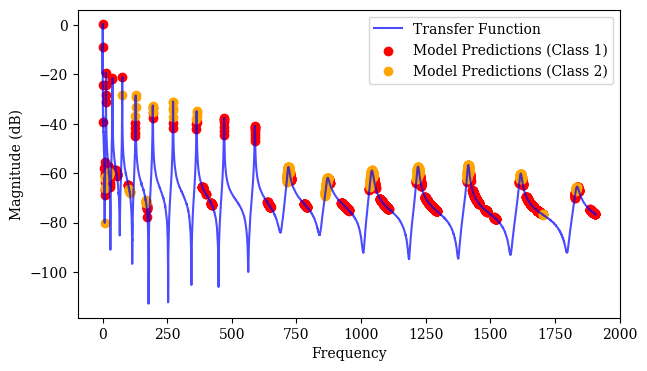

In [431]:
start = 0
end = 10000
beam_predictions = lab_predictions(max_norm_multiclass_7_2, beam_tf_vel[start:end], normalise=None, multiclass=True, extended=True, w=faxis[start:end], max_norm=True, phase=False, logmag=True, scaled_logmag=True)

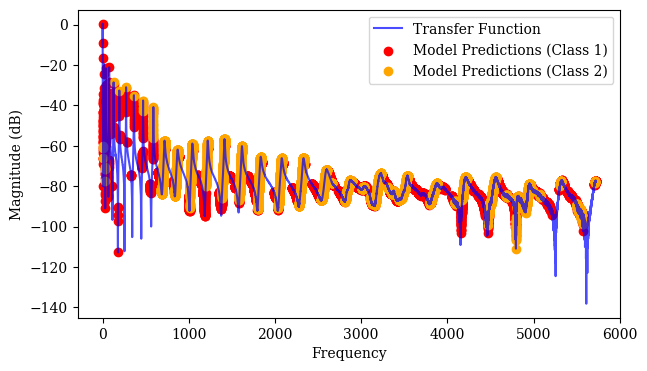

In [440]:
start = 0
end = 30000
beam_predictions = lab_predictions(max_norm_multiclass_8, beam_tf_vel[start:end], normalise=None, multiclass=True, extended=True, w=faxis[start:end], max_norm=True, phase=False, logmag=True, scaled_logmag=True)

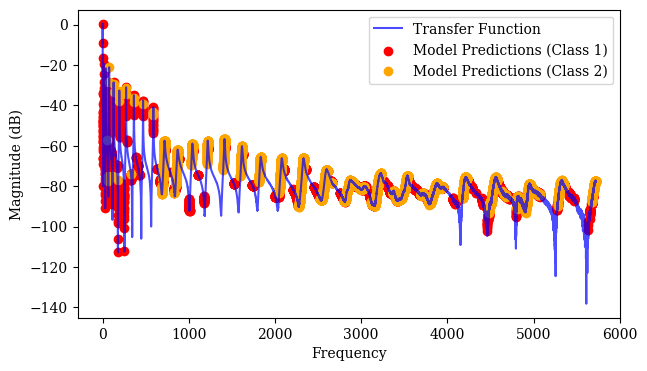

In [434]:
start = 0
end = 30000
beam_predictions = lab_predictions(max_norm_multiclass_9, beam_tf_vel[start:end], normalise=None, multiclass=True, extended=True, w=faxis[start:end], max_norm=True, phase=False, logmag=True, scaled_logmag=True)

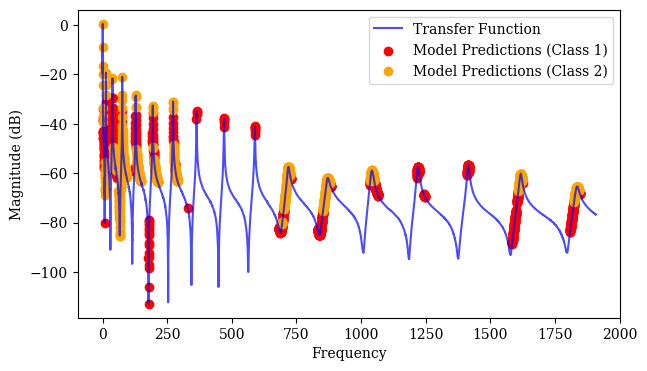

In [13]:
start = 0
end = 10000
beam_predictions = lab_predictions(max_norm_multiclass_10, beam_tf_vel[start:end], normalise=None, multiclass=True, extended=True, w=faxis[start:end], max_norm=True, phase=False, logmag=True, scaled_logmag=True)

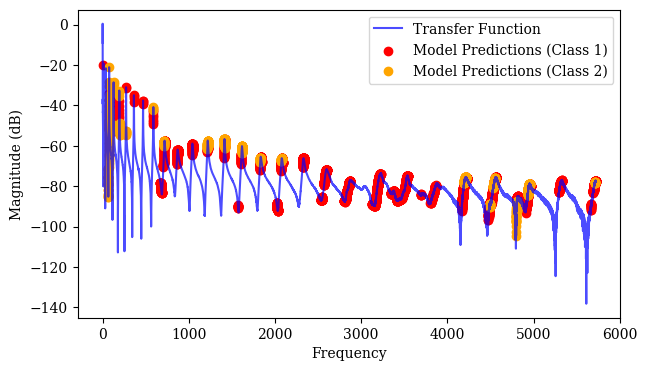

In [15]:
start = 0
end = 30000
beam_predictions = lab_predictions(max_norm_multiclass_11, beam_tf_vel[start:end], normalise=None, multiclass=True, extended=True, w=faxis[start:end], max_norm=True, phase=False)

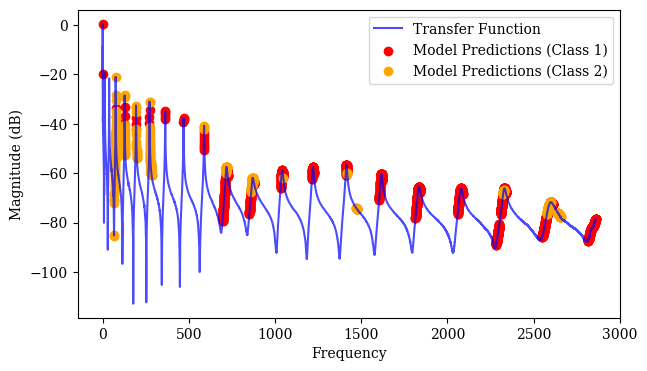

In [25]:
start = 0
end = 15000
beam_predictions = lab_predictions(max_norm_multiclass_11_2, beam_tf_vel[start:end], normalise=None, multiclass=True, extended=True, w=faxis[start:end], max_norm=True, phase=False)

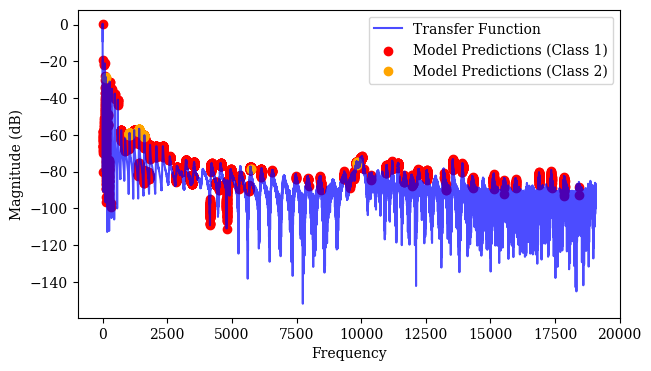

In [14]:
start = 0
end = 100000
beam_predictions = lab_predictions(max_norm_multiclass_12, beam_tf_vel[start:end], normalise=None, multiclass=True, extended=True, w=faxis[start:end], max_norm=True, phase=False)

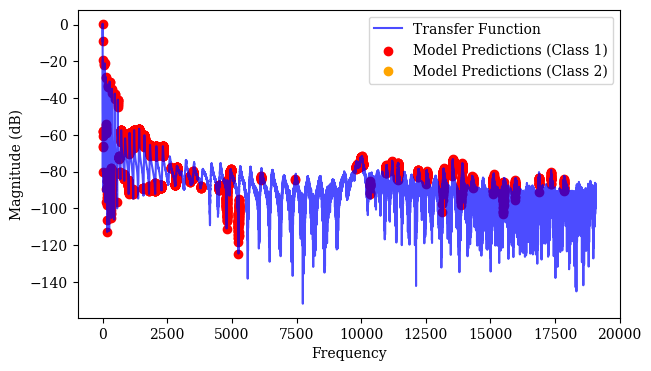

In [39]:
start = 0
end = 100000
beam_predictions = lab_predictions(max_norm_multiclass_13, beam_tf_vel[start:end], normalise=None, multiclass=True, extended=True, w=faxis[start:end], max_norm=True, phase=False)

### 4C6 Data

In [13]:
d = dvma.load_data()


2024-05-16 12:51:13.638 python[38208:63696066] +[CATransaction synchronize] called within transaction


In [121]:
print(d) # 12 transfer functions


<DataSet> class:

          time_data_list: [<TimeData>,... (x12)]
          freq_data_list: [<FreqData>,... (x12)]
    cross_spec_data_list: []
            tf_data_list: [<TfData>,... (x12)]
          sono_data_list: []
          meta_data_list: []



In [14]:
tf = d.tf_data_list[0]
freqs = tf.freq_axis
print(tf.settings)
print(freqs)


<MySettings class>

                channels: 2
                      fs: 3000
              chunk_size: 100
              num_chunks: 9
             viewed_time: 0.3
                   nbits: 16
             stored_time: 3
         pretrig_samples: 100
       pretrig_threshold: 0.05
         pretrig_channel: 0
         pretrig_timeout: 20
           device_driver: nidaq
            device_index: 0
                  VmaxNI: 5
          init_view_time: True
          init_view_freq: True
        init_view_levels: True
    output_device_driver: nidaq
     output_device_index: 0
         output_channels: None
               output_fs: 3000
                  format: 8
             device_name: None
                  window: None
              time_range: None
                   ch_in: 0
              ch_out_set: [1]

[0.00000000e+00 3.33333333e-01 6.66666667e-01 ... 1.49933333e+03
 1.49966667e+03 1.50000000e+03]


In [15]:
# sampling rate 3000 Hz (from 4C6 handout), given transfer functions are acceleration not velocity
faxis = np.fft.rfftfreq(2 * d.tf_data_list[0].tf_data.shape[0] - 1, d=1/3000) # shape (4501,)
faxis = faxis[1:] # remove 0 frequency, shape = (4500,)
print(faxis)

[3.33296300e-01 6.66592601e-01 9.99888901e-01 ... 1.49916676e+03
 1.49950006e+03 1.49983335e+03]


In [16]:
tf_dict = {}
for i in range(12):
    tf_dict[f'tf_{i}'] = d.tf_data_list[i].tf_data[1:].reshape(-1) / (1j * faxis) # with divide by 2pi this time

/Users/vaibhav/Documents/Engineering/Project/src/lab.py:62: RuntimeWarning: divide by zero encountered in divide
  phase = np.arctan(np.imag(lab_tf)/np.real(lab_tf))


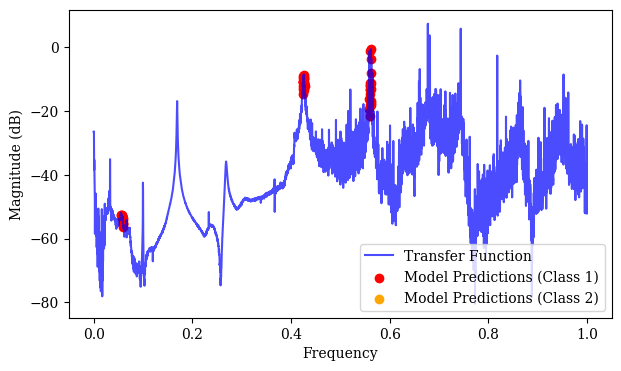

In [218]:
predictions = lab_predictions(multiclass, tf_dict['tf_2'], normalise= None, multiclass=True, extended=True)


/var/folders/mw/j7jd8sy576gdhd74r9ppm1qc0000gn/T/ipykernel_75173/1046613783.py:14: RuntimeWarning: divide by zero encountered in divide
  phase = np.arctan(np.imag(tf_arr)/np.real(tf_arr))


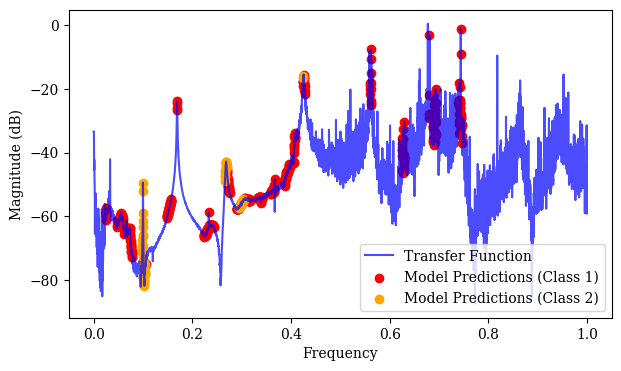

In [427]:
predictions = lab_predictions(max_norm_multiclass_2, tf_dict['tf_2'][:], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False)

/var/folders/mw/j7jd8sy576gdhd74r9ppm1qc0000gn/T/ipykernel_43070/1046613783.py:14: RuntimeWarning: divide by zero encountered in divide
  phase = np.arctan(np.imag(tf_arr)/np.real(tf_arr))


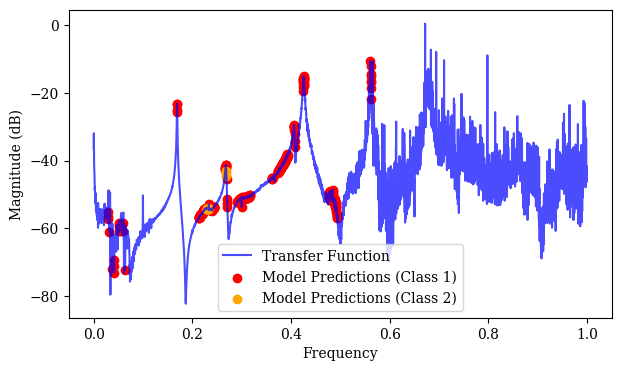

In [28]:
predictions = lab_predictions(max_norm_multiclass_12, tf_dict['tf_5'][:], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False)

/var/folders/mw/j7jd8sy576gdhd74r9ppm1qc0000gn/T/ipykernel_43070/1046613783.py:14: RuntimeWarning: divide by zero encountered in divide
  phase = np.arctan(np.imag(tf_arr)/np.real(tf_arr))


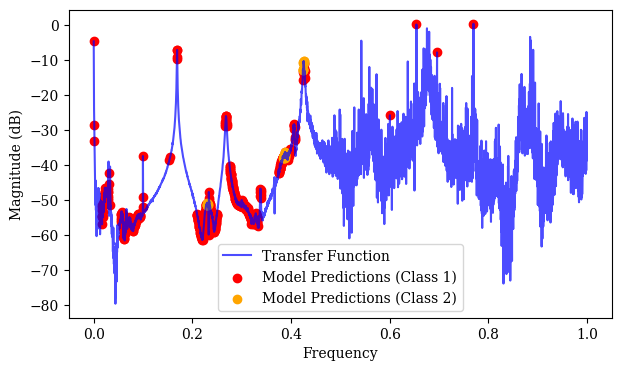

In [57]:
predictions = lab_predictions(max_norm_multiclass_13, tf_dict['tf_4'][:], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False)

/var/folders/mw/j7jd8sy576gdhd74r9ppm1qc0000gn/T/ipykernel_81327/1046613783.py:14: RuntimeWarning: divide by zero encountered in divide
  phase = np.arctan(np.imag(tf_arr)/np.real(tf_arr))


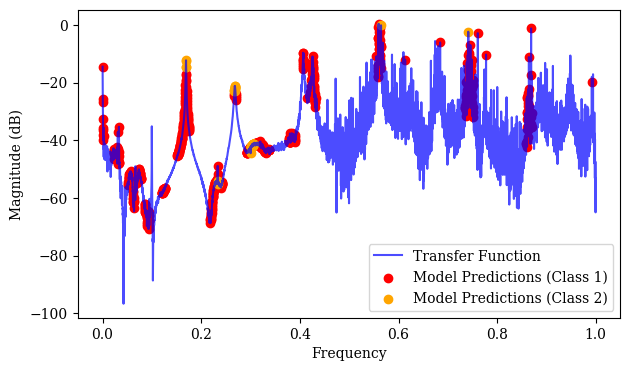

In [21]:
predictions = lab_predictions(max_norm_multiclass_15, tf_dict['tf_1'][:], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False)

/var/folders/mw/j7jd8sy576gdhd74r9ppm1qc0000gn/T/ipykernel_38208/1046613783.py:14: RuntimeWarning: divide by zero encountered in divide
  phase = np.arctan(np.imag(tf_arr)/np.real(tf_arr))


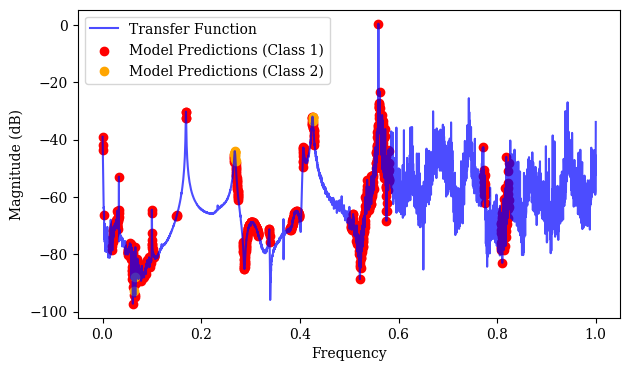

In [23]:
predictions = lab_predictions(max_norm_multiclass_16, tf_dict['tf_7'][:], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False)

### 3C6 Data

In [10]:
lab_tf = lab.load_data()

2024-05-16 12:49:35.614 python[38208:63696066] +[CATransaction synchronize] called within transaction


In [11]:
lab_tf_noisy = lab.load_data()

2024-05-16 12:49:50.720 python[38208:63696066] +[CATransaction synchronize] called within transaction


In [441]:
print(len(lab_tf_noisy))

45001


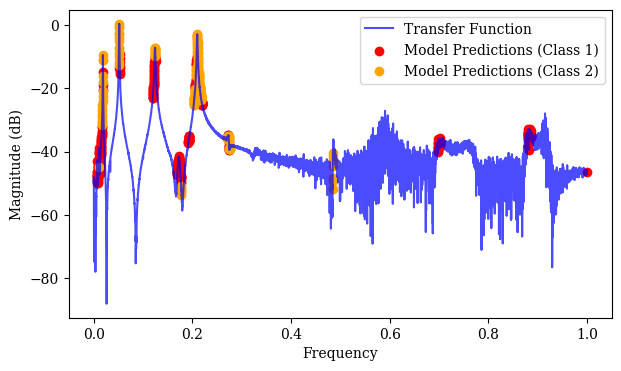

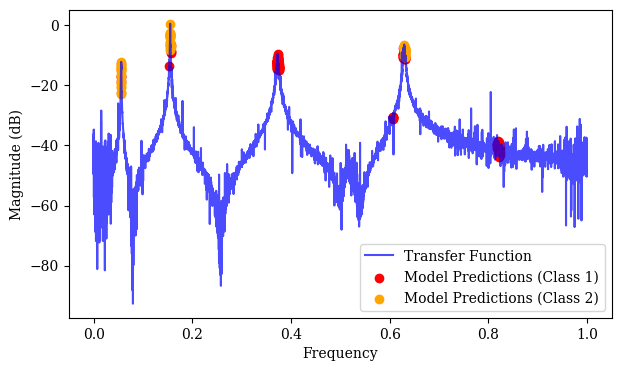

In [442]:
predictions = lab_predictions(max_norm_multiclass_2, lab_tf[:15000], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False)
predictions = lab_predictions(max_norm_multiclass_2, lab_tf_noisy[:15000], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False)

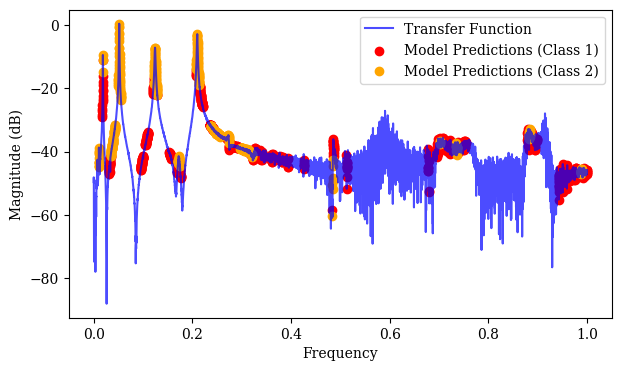

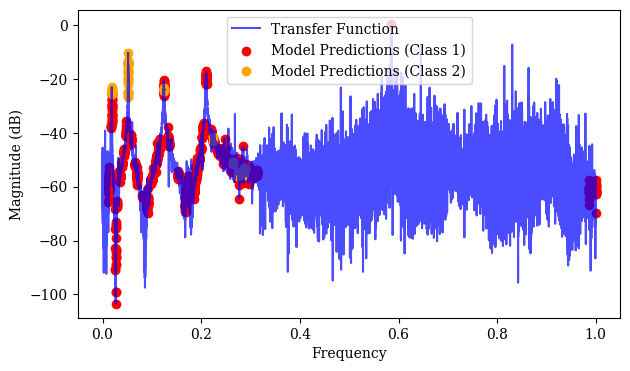

In [385]:
predictions = lab_predictions(max_norm_multiclass_3, lab_tf[:], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False)
predictions = lab_predictions(max_norm_multiclass_3, lab_tf_noisy, normalise=None, multiclass=True, extended=True, max_norm=True, phase=False)

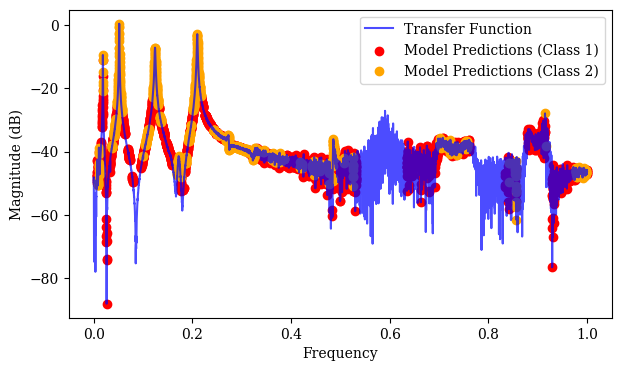

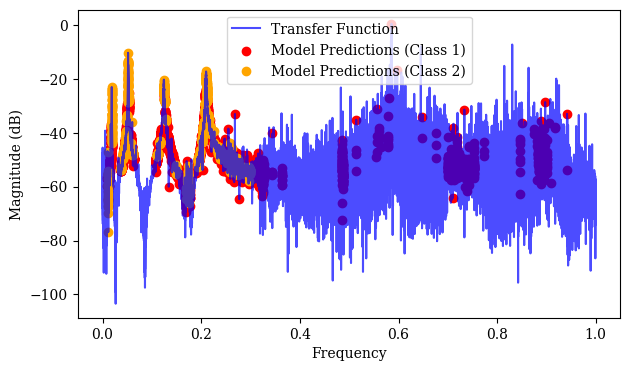

In [436]:
predictions = lab_predictions(max_norm_multiclass_6, lab_tf[:], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False, logmag=True)
predictions = lab_predictions(max_norm_multiclass_6, lab_tf_noisy, normalise=None, multiclass=True, extended=True, max_norm=True, phase=False, logmag=True)

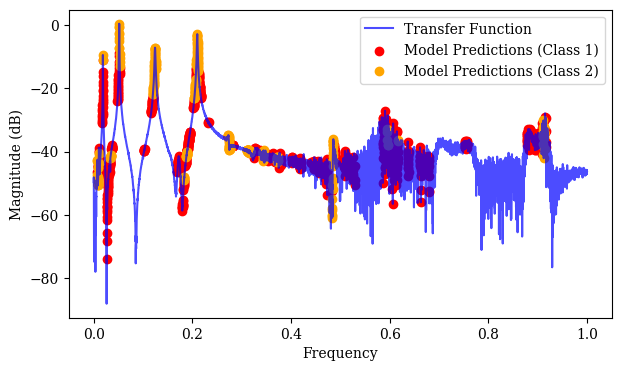

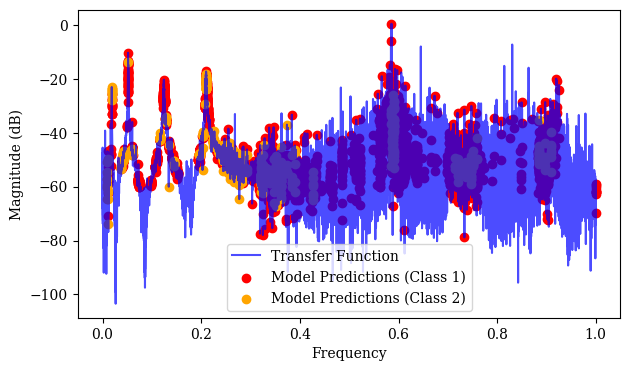

In [424]:
predictions = lab_predictions(max_norm_multiclass_7_2, lab_tf[:], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False, logmag=True, scaled_logmag=True)
predictions = lab_predictions(max_norm_multiclass_7_2, lab_tf_noisy, normalise=None, multiclass=True, extended=True, max_norm=True, phase=False, logmag=True, scaled_logmag=True)

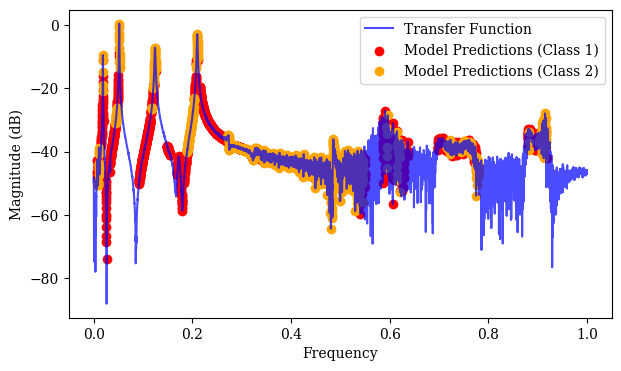

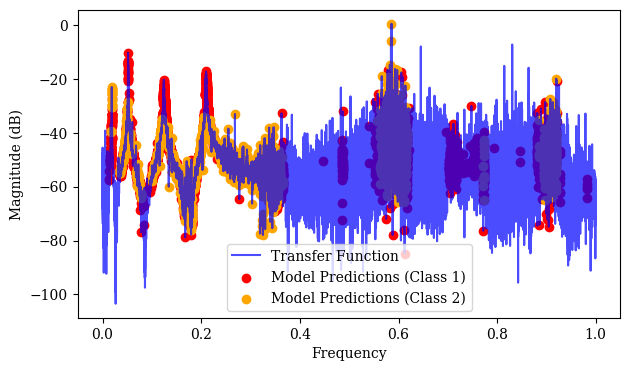

In [425]:
predictions = lab_predictions(max_norm_multiclass_8, lab_tf[:], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False, logmag=True, scaled_logmag=True)
predictions = lab_predictions(max_norm_multiclass_8, lab_tf_noisy, normalise=None, multiclass=True, extended=True, max_norm=True, phase=False, logmag=True, scaled_logmag=True)

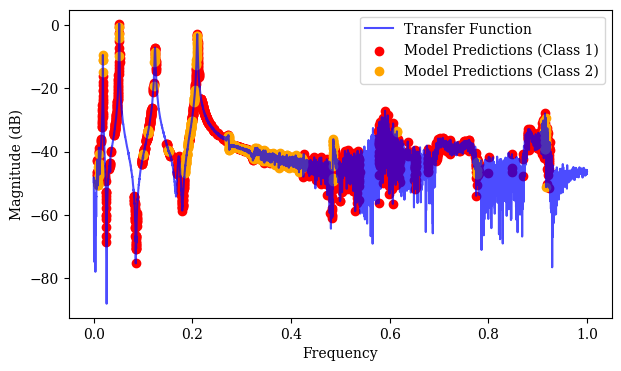

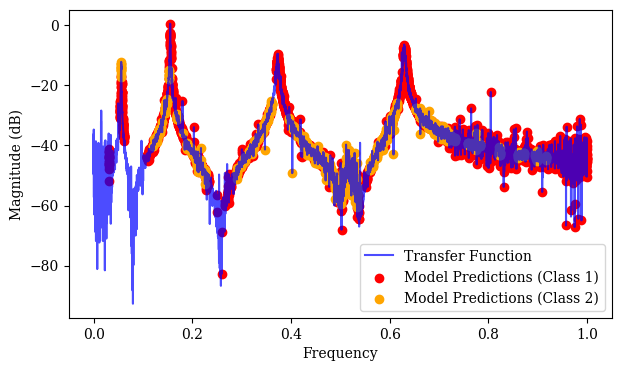

In [443]:
predictions = lab_predictions(max_norm_multiclass_9, lab_tf[:15000], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False, logmag=True, scaled_logmag=True)
predictions = lab_predictions(max_norm_multiclass_9, lab_tf_noisy[:15000], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False, logmag=True, scaled_logmag=True)

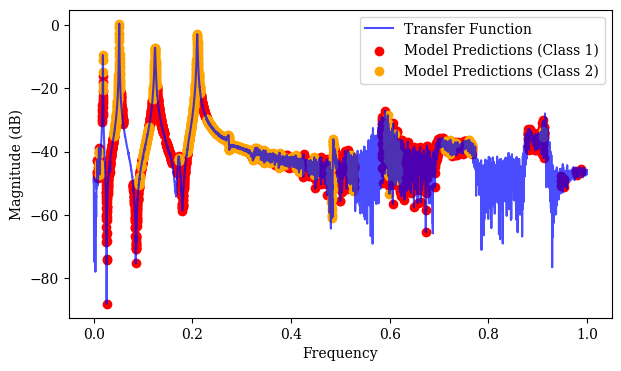

In [19]:
predictions = lab_predictions(max_norm_multiclass_10, lab_tf[:], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False, logmag=True, scaled_logmag=True)
predictions = lab_predictions(max_norm_multiclass_10, lab_tf_noisy[:], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False, logmag=True, scaled_logmag=True)

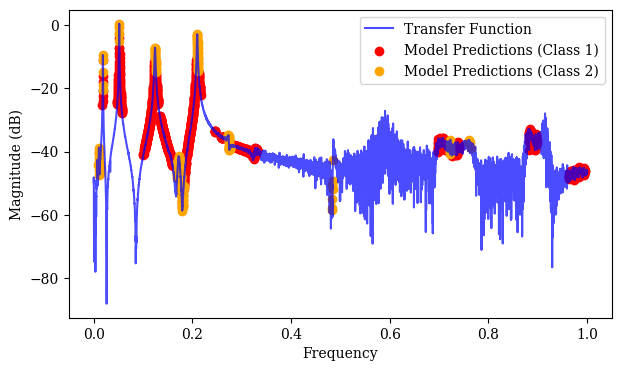

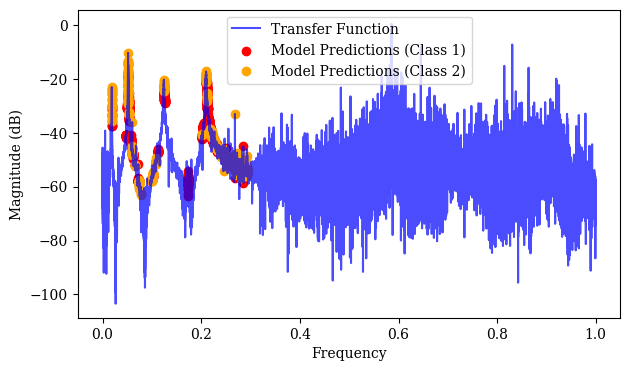

In [21]:
predictions = lab_predictions(max_norm_multiclass_11, lab_tf[:], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False)
predictions = lab_predictions(max_norm_multiclass_11, lab_tf_noisy[:], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False)

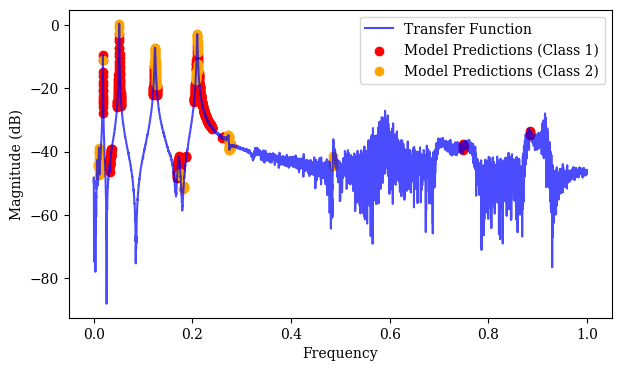

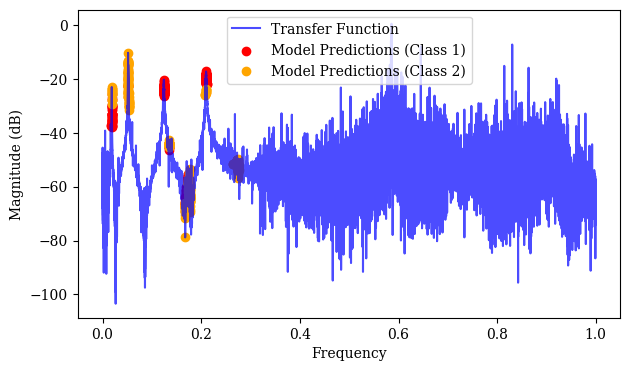

In [23]:
predictions = lab_predictions(max_norm_multiclass_11_2, lab_tf[:], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False)
predictions = lab_predictions(max_norm_multiclass_11_2, lab_tf_noisy[:], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False)

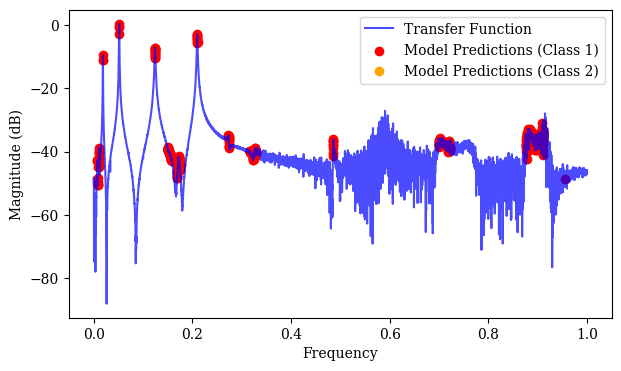

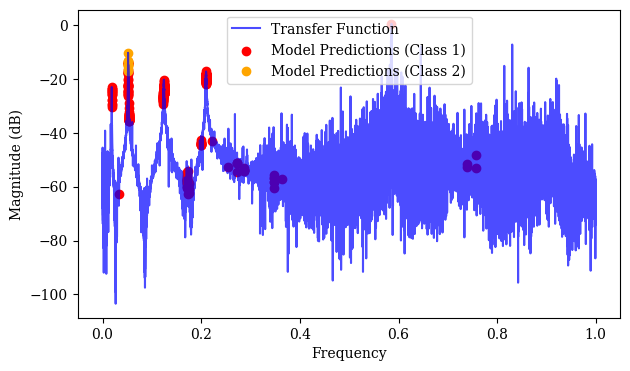

In [19]:
predictions = lab_predictions(max_norm_multiclass_12, lab_tf[:], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False)
predictions = lab_predictions(max_norm_multiclass_12, lab_tf_noisy[:], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False)

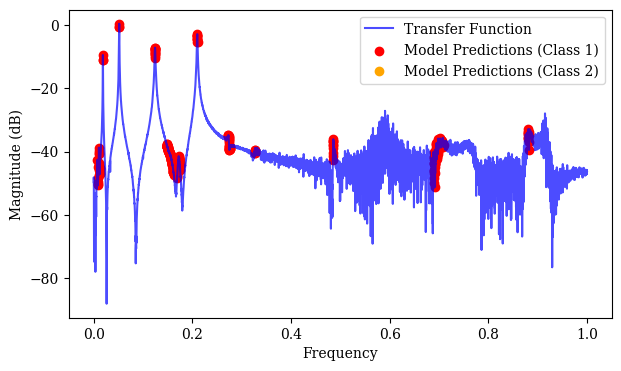

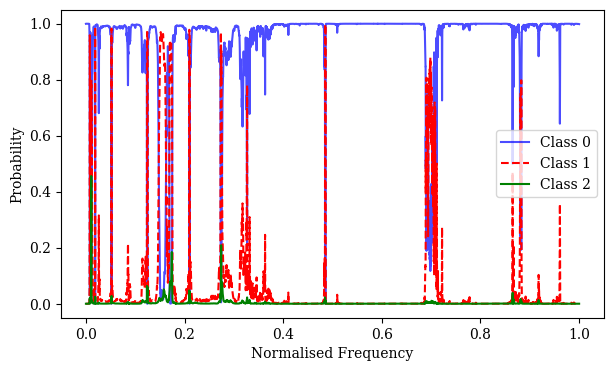

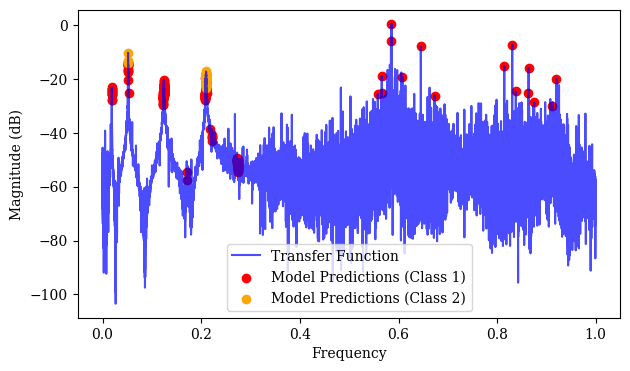

In [50]:
predictions = lab_predictions(max_norm_multiclass_13, lab_tf[:], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False)
plot_lab_predictive_probs_multiclass(predictions)
predictions = lab_predictions(max_norm_multiclass_13, lab_tf_noisy[:], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False)

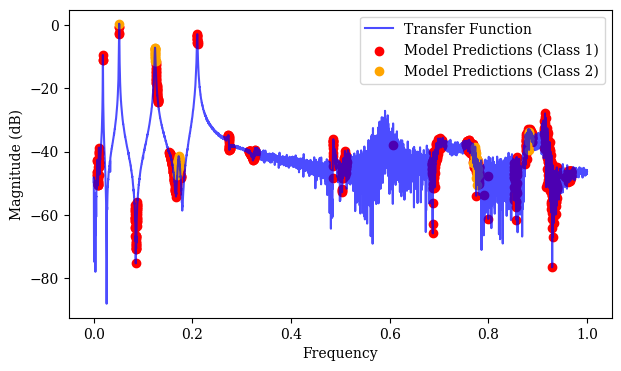

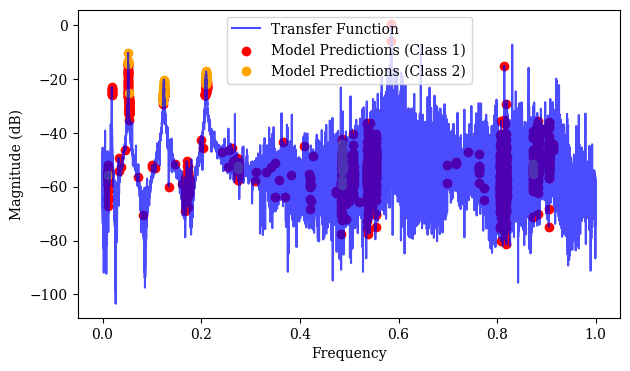

In [12]:
predictions = lab_predictions(max_norm_multiclass_14, lab_tf[:], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False)
# plot_lab_predictive_probs_multiclass(predictions)
predictions = lab_predictions(max_norm_multiclass_14, lab_tf_noisy[:], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False)

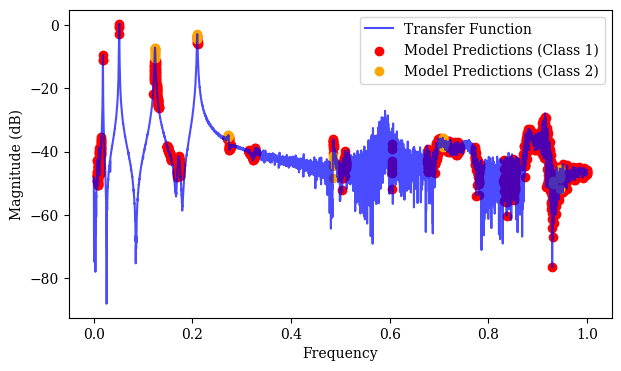

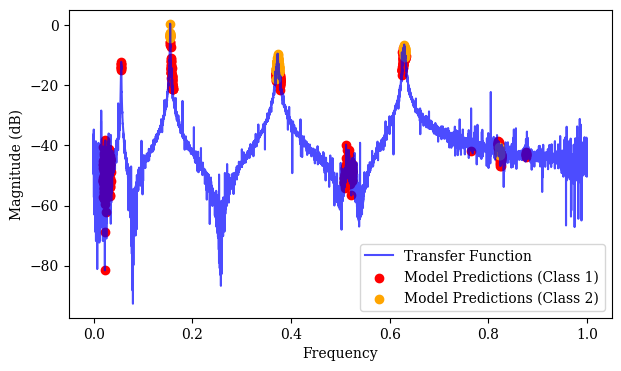

In [13]:
predictions = lab_predictions(max_norm_multiclass_15, lab_tf[:15000], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False)
# plot_lab_predictive_probs_multiclass(predictions)
predictions = lab_predictions(max_norm_multiclass_15, lab_tf_noisy[:15000], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False)

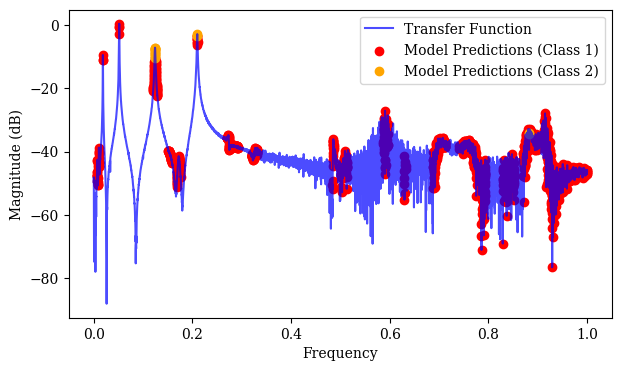

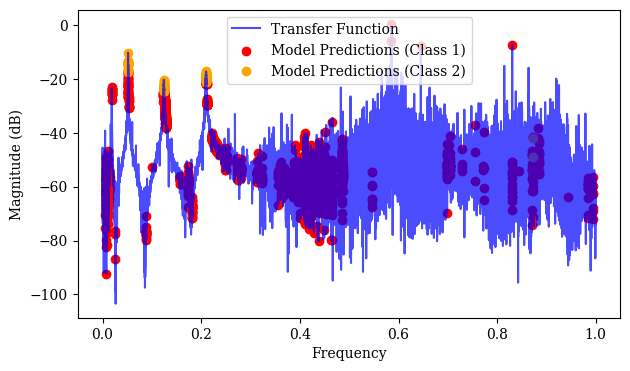

In [12]:
predictions = lab_predictions(max_norm_multiclass_16, lab_tf[:], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False)
# plot_lab_predictive_probs_multiclass(predictions)
predictions = lab_predictions(max_norm_multiclass_16, lab_tf_noisy[:], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False)

In [42]:
def lab_predictions_tr(model, tf_arr, multiclass=False, w = None, max_norm=True):
    """Predictions from a trained model on a given transfer function."""

    real_imag = modal.split_real_imag(tf_arr)
    phase = np.arctan(np.imag(tf_arr)/np.real(tf_arr))
    mag = np.abs(tf_arr)
    max_mag = np.max(mag)
    mag = mag / (0.95 * max_mag)
    real_imag = real_imag / (0.95 * max_mag)
    extended_tf = np.concatenate((real_imag, phase.reshape(-1,1), mag.reshape(-1,1)), axis=1)
    lab_tf_tensor = torch.from_numpy(extended_tf).to(torch.float32)
    print(lab_tf_tensor.shape)
    lab_tf_tensor = lab_tf_tensor.reshape(1, lab_tf_tensor.shape[0], lab_tf_tensor.shape[1])
    model.eval()
    with torch.no_grad():
        lab_tf_output = model(lab_tf_tensor)
    
    
    test_op = np.array(lab_tf_output.numpy())
    predictions = np.argmax(test_op, axis=-1).reshape(-1)
    
    input_tf = modal.split_real_imag(tf_arr)
    y = predictions

    fig, ax = plt.subplots(figsize=(7,4))
    if w is None:
        w = np.linspace(0, 1, len(y))

    tf = modal.to_db(real_imag)


    ax.plot(w, tf, label = 'Transfer Function', c='blue', alpha=0.7)
    ax.scatter(w[y == 1], tf[y == 1], c='red', marker='o', label=r'Model Predictions (Class 1)')
    if multiclass:
        ax.scatter(w[y == 2], tf[y == 2], c='orange', marker='o', label=r'Model Predictions (Class 2)')
    if w is not None:
        ax.set_xlabel('Frequency')
    else:
        ax.set_xlabel('Normalised Frequency')
    ax.set_ylabel('Magnitude (dB)')
    ax.legend()
    plt.show()

    return test_op

In [53]:
predictions = lab_predictions_tr(transformer1, lab_tf[:])
# plot_lab_predictive_probs_multiclass(predictions)
predictions = lab_predictions_tr(transformer1, lab_tf_noisy[:])

torch.Size([8183, 4])


RuntimeError: The size of tensor a (8183) must match the size of tensor b (5000) at non-singleton dimension 1

### clavichord (chan 1), a spinet (chan 2) and a harpsichord (chan 3)

In [29]:
clav_spinet_harps_data = scipy.io.loadmat('./Lab Data/Jim Woodhouse/Clav_spinet_harps_admittance_cal.mat')

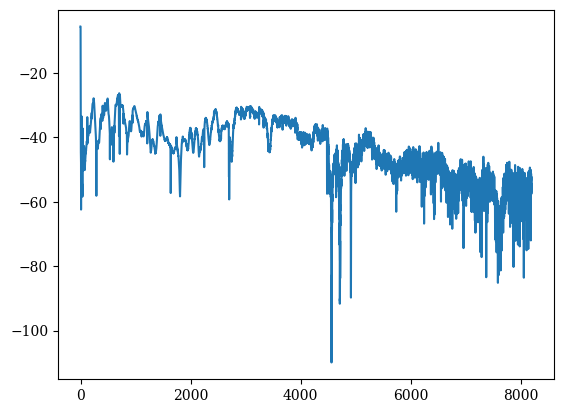

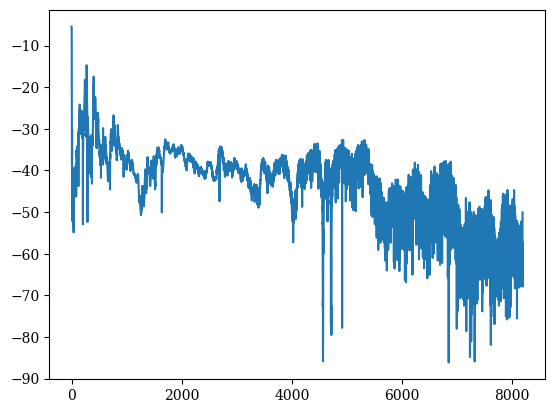

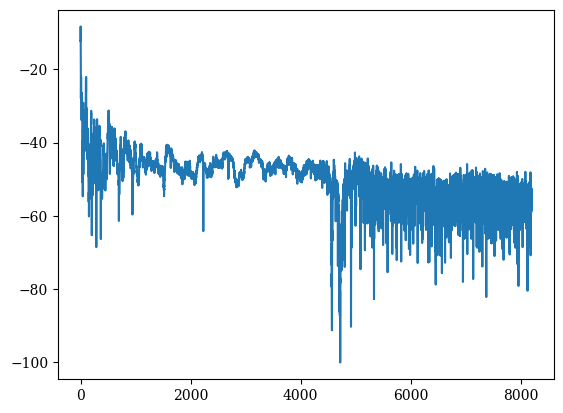

In [30]:
clav_tf = clav_spinet_harps_data['yspec'][:, 0] 
plt.plot(modal.to_db(clav_tf))
plt.show()
spinet_tf = clav_spinet_harps_data['yspec'][:, 1]
plt.plot(modal.to_db(spinet_tf))
plt.show()
harps_tf = clav_spinet_harps_data['yspec'][:, 2]
plt.plot(modal.to_db(harps_tf))
plt.show()

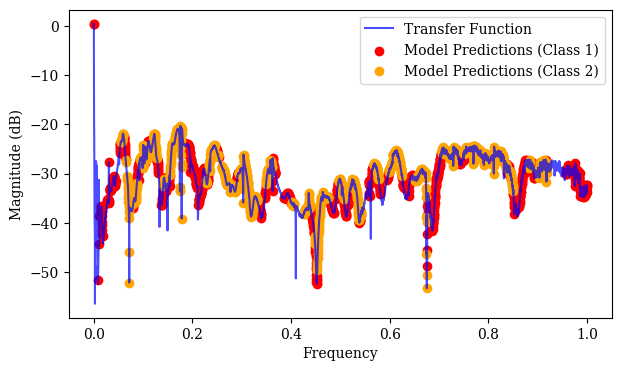

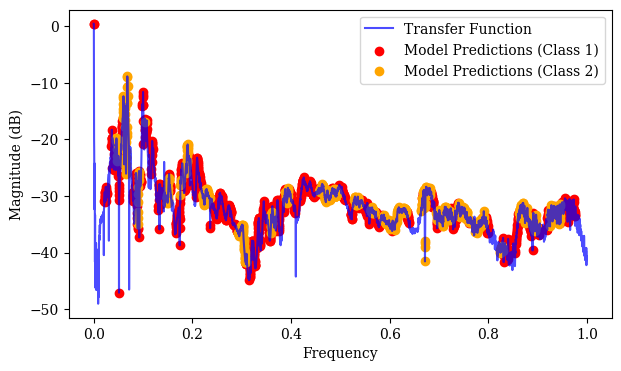

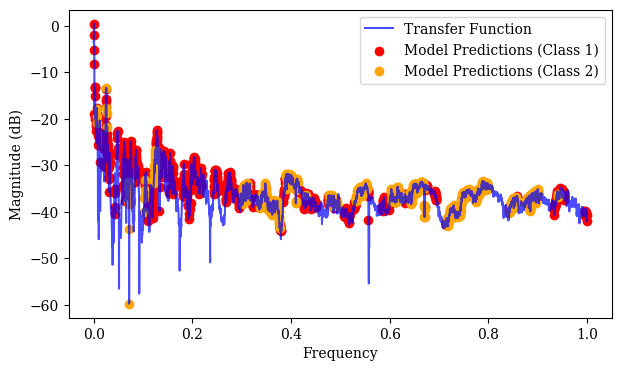

In [379]:
end = 4000
predictions = lab_predictions(max_norm_multiclass_2, clav_tf[:end], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False)
predictions = lab_predictions(max_norm_multiclass_2, spinet_tf[:end], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False)
predictions = lab_predictions(max_norm_multiclass_2, harps_tf[:end], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False)


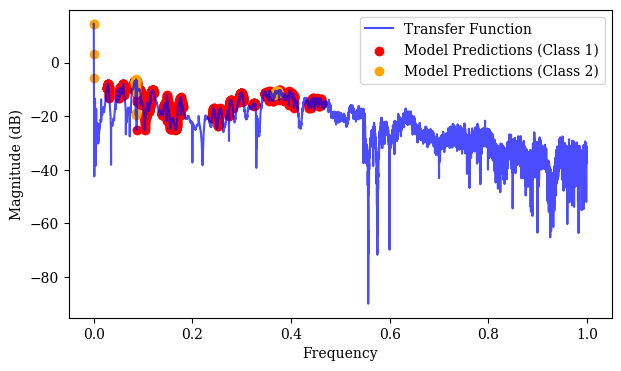

In [340]:
predictions = lab_predictions(multiclass, 10*clav_tf[:], normalise=None, multiclass=True, extended=True, max_norm=False, phase=False)


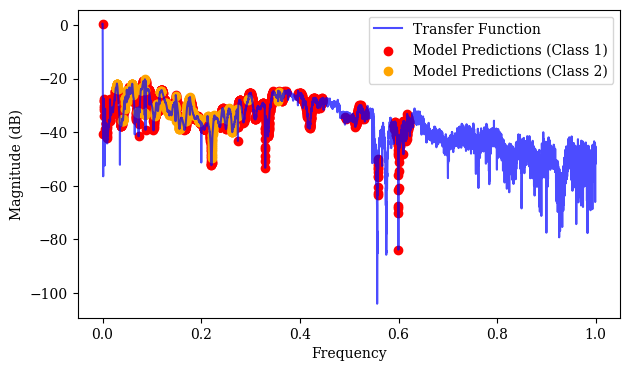

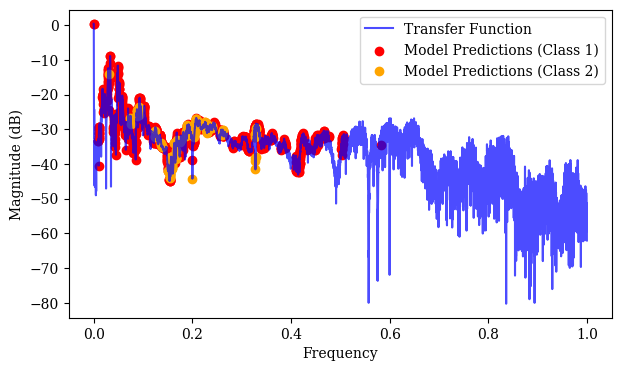

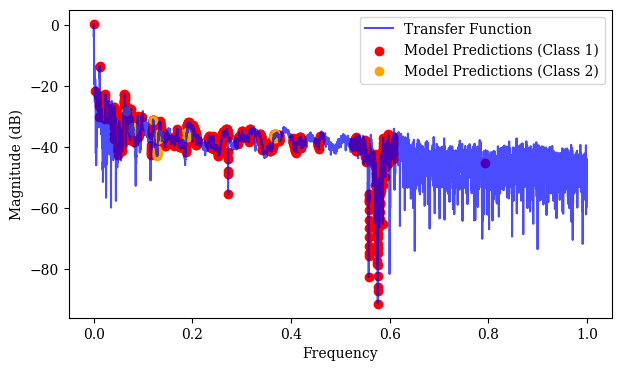

In [32]:
end = -1
predictions = lab_predictions(max_norm_multiclass_12, clav_tf[:end], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False)
predictions = lab_predictions(max_norm_multiclass_12, spinet_tf[:end], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False)
predictions = lab_predictions(max_norm_multiclass_12, harps_tf[:end], normalise=None, multiclass=True, extended=True, max_norm=True, phase=False)
